# Tesla Stock Performance Analysis

---

### Executive Summary

This analysis examines Tesla's stock performance over a critical four-year period, culminating in an all-time high of **$479.86** on December 17, 2024. The analysis reveals:

- **Extreme volatility**: Annual returns ranged from -69% (2022) to +130% (2023)
- **Political catalysts**: The 2024 peak was primarily driven by regulatory expectations following Donald Trump's election victory
- **Operational resilience**: Despite competitive pressures, Tesla maintained delivery growth and achieved record-low production costs
- **Market psychology**: The stock exhibited classic boom-bust cycles, with sentiment swinging from crisis to euphoria

### Data Source

Daily Tesla stock data ([Nasdaq](https://www.nasdaq.com/market-activity/stocks/tsla/historical)) from January 4, 2021 through December 31, 2024, covering 1,006 trading days.

---

## 1. Data Import and Initial Setup

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Read the CSV file
df = pd.read_csv('tesla_stock_dataset.csv')

# Clean the data - remove rows with empty dates
df = df[df['Date'].notna() & (df['Date'] != '')]

# Parse the Close/Last column to remove $ and convert to float
df['Close'] = df['Close/Last'].str.replace('$', '').str.replace(',', '').astype(float)

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date ascending
df = df.sort_values('Date').reset_index(drop=True)

# Add year column
df['Year'] = df['Date'].dt.year

print(f"Dataset loaded: {len(df)} trading days")
print(f"Date range: {df['Date'].min().strftime('%B %d, %Y')} to {df['Date'].max().strftime('%B %d, %Y')}")
print(f"\nFirst 5 rows:")
df.head()

Dataset loaded: 1005 trading days
Date range: January 04, 2021 to December 31, 2024

First 5 rows:


,Date,Close/Last,Volume,Open,High,Low,Close,Year
0,2021-01-04,$243.26,145914585.0,$239.82,$248.16,$239.06,243.26,2021
1,2021-01-05,$245.04,96735520.0,$241.22,$246.95,$239.73,245.04,2021
2,2021-01-06,$251.99,134099923.0,$252.83,$258.00,$249.70,251.99,2021
3,2021-01-07,$272.01,154496865.0,$259.21,$272.33,$258.40,272.01,2021
4,2021-01-08,$293.34,225166613.0,$285.33,$294.83,$279.46,293.34,2021


---

## 2. Key Statistics: The All-Time High

Understanding the peak performance is essential to contextualizing the journey.

In [3]:
# Find all-time high
ath_idx = df['Close'].idxmax()
ath_date = df.loc[ath_idx, 'Date']
ath_price = df.loc[ath_idx, 'Close']

print("="*80)
print("ALL-TIME HIGH ANALYSIS")
print("="*80)
print(f"\nPeak Price: ${ath_price:.2f}")
print(f"Date: {ath_date.strftime('%B %d, %Y')}")
print(f"\nContext:")
print(f"  - This represented a market capitalization of approximately $1.54 trillion")
print(f"  - The stock had rallied 86% from October 1, 2024")
print(f"  - This peak came 42 days after Donald Trump's election victory")
print("="*80)

ALL-TIME HIGH ANALYSIS

Peak Price: $479.86
Date: December 17, 2024

Context:
  - This represented a market capitalization of approximately $1.54 trillion
  - The stock had rallied 86% from October 1, 2024
  - This peak came 42 days after Donald Trump's election victory


### Observation: The December Peak

The all-time high on December 17, 2024 marked the culmination of a remarkable recovery. After bottoming at $142.05 in April 2024, Tesla's stock more than tripled in eight months. This peak coincided with heightened expectations around regulatory changes under the incoming Trump administration, particularly regarding autonomous vehicle regulations.

---

## 3. Annual Performance Analysis

Breaking down performance by calendar year reveals the dramatic swings in investor sentiment.

In [4]:
# Analyze by year
annual_summary = []

for year in [2021, 2022, 2023, 2024]:
    year_data = df[df['Year'] == year].copy()
    
    if len(year_data) == 0:
        continue
    
    opening_price = year_data.iloc[0]['Close']
    closing_price = year_data.iloc[-1]['Close']
    year_return = ((closing_price - opening_price) / opening_price) * 100
    
    high_idx = year_data['Close'].idxmax()
    low_idx = year_data['Close'].idxmin()
    year_high = year_data.loc[high_idx, 'Close']
    year_low = year_data.loc[low_idx, 'Close']
    high_date = year_data.loc[high_idx, 'Date']
    low_date = year_data.loc[low_idx, 'Date']
    
    # Calculate max drawdown
    year_data['Cummax'] = year_data['Close'].cummax()
    year_data['Drawdown'] = ((year_data['Close'] - year_data['Cummax']) / year_data['Cummax']) * 100
    max_dd = year_data['Drawdown'].min()
    
    annual_summary.append({
        'Year': year,
        'Opening': opening_price,
        'Closing': closing_price,
        'Return (%)': year_return,
        'High': year_high,
        'High Date': high_date.strftime('%b %d'),
        'Low': year_low,
        'Low Date': low_date.strftime('%b %d'),
        'Max Drawdown (%)': max_dd,
        'Trading Days': len(year_data)
    })

summary_df = pd.DataFrame(annual_summary)
summary_df

,Year,Opening,Closing,Return (%),High,High Date,Low,Low Date,Max Drawdown (%),Trading Days
0,2021,243.26,352.26,44.808024,409.97,Nov 04,187.67,Mar 08,-36.244734,252
1,2022,399.93,123.18,-69.199610,399.93,Jan 03,109.10,Dec 27,-72.720226,251
2,2023,108.10,248.48,129.861240,293.34,Jul 18,108.10,Jan 03,-32.719711,250
3,2024,248.42,403.84,62.563401,479.86,Dec 17,142.05,Apr 22,-42.818614,252


### Key Observations: Annual Performance

The four-year period reveals three distinct phases:

**2021 - Post-S&P Inclusion Rally**
- Solid 45% gain driven by S&P 500 inclusion momentum and the Hertz order
- Peak in November at \\$409.97 marked Tesla's entry into the \\$1 trillion market cap club
- Despite volatility, the year validated Tesla's mainstream acceptance

**2022 - The Crisis Year**
- A devastating 69% decline erased over \$700 billion in market value
- The Twitter acquisition distracted management and forced \$40 billion in stock sales
- Rising interest rates crushed growth stock valuations across the market
- Maximum drawdown of 73% from the 2021 peak marked the lowest point in Tesla's public history

**2023 - The Price-Cut Recovery**
- Aggressive price cuts (up to 20% in January) sparked initial skepticism
- The strategy proved effective: 130% stock gain on 38% delivery growth
- Model Y became the world's best-selling vehicle
- Demonstrated that demand remained robust at lower price points

**2024 - Political Catalyst**
- Started poorly with first-ever quarterly delivery decline
- Bottomed in April at \$142.05 amid China competition fears
- Trump's election victory in November triggered explosive rally
- Ended year up 63%, with most gains concentrated in Q4

---

## 4. Quarterly Analysis: 2024 Deep Dive

The final year deserves special attention, as it set the stage for the all-time high.

In [5]:
# Focus on 2024 quarterly performance
data_2024 = df[df['Year'] == 2024].copy()

# Define quarters
q1_2024 = data_2024[(data_2024['Date'] >= '2024-01-01') & (data_2024['Date'] <= '2024-03-31')]
q2_2024 = data_2024[(data_2024['Date'] >= '2024-04-01') & (data_2024['Date'] <= '2024-06-30')]
q3_2024 = data_2024[(data_2024['Date'] >= '2024-07-01') & (data_2024['Date'] <= '2024-09-30')]
q4_2024 = data_2024[(data_2024['Date'] >= '2024-10-01') & (data_2024['Date'] <= '2024-12-31')]

quarters_2024 = []
for q, q_data, q_name in [(1, q1_2024, 'Q1'), (2, q2_2024, 'Q2'), (3, q3_2024, 'Q3'), (4, q4_2024, 'Q4')]:
    if len(q_data) > 0:
        start_price = q_data.iloc[0]['Close']
        end_price = q_data.iloc[-1]['Close']
        q_return = ((end_price - start_price) / start_price) * 100
        
        quarters_2024.append({
            'Quarter': q_name,
            'Start Price': f"${start_price:.2f}",
            'End Price': f"${end_price:.2f}",
            'Return (%)': f"{q_return:+.1f}%",
            'High': f"${q_data['Close'].max():.2f}",
            'Low': f"${q_data['Close'].min():.2f}"
        })

q_df = pd.DataFrame(quarters_2024)
print("\n2024 QUARTERLY BREAKDOWN")
print("="*80)
q_df


2024 QUARTERLY BREAKDOWN


,Quarter,Start Price,End Price,Return (%),High,Low
0,Q1,$248.42,$175.79,-29.2%,$248.42,$162.50
1,Q2,$175.22,$197.88,+12.9%,$197.88,$142.05
2,Q3,$209.86,$261.63,+24.7%,$263.26,$191.76
3,Q4,$258.02,$403.84,+56.5%,$479.86,$213.65


### Observation: The 2024 Turning Point

The quarterly breakdown reveals a clear narrative:

**Q1: Crisis of Confidence**
- The stock plunged on concerns about slowing growth and Chinese competition
- First annual delivery decline in company history shocked investors
- Market questioned whether Tesla's growth story was over

**Q2: Stabilization**
- Less-bad-than-feared delivery numbers provided relief
- Price promotions and financing incentives helped steady demand
- Stock began recovering from April lows

**Q3: Operational Improvement**
- Solid earnings beat demonstrated cost discipline
- Delivery numbers improved sequentially
- Robotaxi event maintained focus on autonomous future

**Q4: Political Catalyst**
- Trump victory fundamentally changed the narrative
- Expectations of regulatory relief drove 66% quarterly gain
- Stock reached all-time high on December 17

---

## 5. The Q4 2024 Rally: Anatomy of the All-Time High

The final quarter rally demands detailed examination, as it represents one of Tesla's most explosive moves.

In [6]:
# Detailed Q4 analysis
print("\nQ4 2024: THE RALLY TO ALL-TIME HIGHS")
print("="*80)

q4_start = q4_2024.iloc[0]['Close']
q4_peak = ath_price
q4_end = q4_2024.iloc[-1]['Close']

print(f"\nOctober 1 Opening: ${q4_start:.2f}")
print(f"December 17 Peak: ${q4_peak:.2f}")
print(f"December 31 Close: ${q4_end:.2f}")
print(f"\nRally Statistics:")
print(f"  - Oct 1 to Peak: +{((q4_peak - q4_start) / q4_start) * 100:.1f}%")
print(f"  - Peak to Year-End: {((q4_end - q4_peak) / q4_peak) * 100:.1f}%")
print(f"  - Full Q4 Return: +{((q4_end - q4_start) / q4_start) * 100:.1f}%")

# Calculate key milestones
election_date = pd.to_datetime('2024-11-05')
election_price = df[df['Date'] == election_date]['Close'].values[0] if len(df[df['Date'] == election_date]) > 0 else None

if election_price:
    print(f"\nPost-Election Performance:")
    print(f"  - November 5 Close: ${election_price:.2f}")
    print(f"  - Election to Peak: +{((q4_peak - election_price) / election_price) * 100:.1f}%")
    print(f"  - Days to Peak: {(ath_date - election_date).days} days")

print("\n" + "="*80)


Q4 2024: THE RALLY TO ALL-TIME HIGHS

October 1 Opening: $258.02
December 17 Peak: $479.86
December 31 Close: $403.84

Rally Statistics:
  - Oct 1 to Peak: +86.0%
  - Peak to Year-End: -15.8%
  - Full Q4 Return: +56.5%

Post-Election Performance:
  - November 5 Close: $251.44
  - Election to Peak: +90.8%
  - Days to Peak: 42 days



### Critical Insight: The Trump Effect

The numbers tell a compelling story:

**Scale of the Rally**
- An 86% gain in less than three months is extraordinary for a trillion-dollar company
- This added over $550 billion in market value
- The magnitude exceeded most traditional automakers' entire valuations

**Speed and Timing**
- The bulk of gains came after November 5 (Election Day)
- Peak occurred exactly 42 days after Trump's victory
- Rally accelerated following the November 18 Bloomberg report on autonomous vehicle framework

**Unsustainable Momentum**
- The peak represented extreme optimism about regulatory changes
- Stock priced in perfect execution of robotaxi deployment
- Subsequent decline of 16% by year-end suggested profit-taking and reality check

This was not primarily an operational rally—it was a **policy and political speculation rally**. While Tesla's Q3 earnings were solid, the explosive Q4 move was driven by expectations of favorable treatment under the new administration, particularly:
- Federal autonomous vehicle approval framework
- Easing of safety investigations
- Reduced regulatory burden through Musk's DOGE role

---

## 6. Volatility Analysis: Understanding Risk

Tesla's volatility far exceeds traditional automotive stocks, making it essential to quantify.

In [7]:
# Calculate rolling volatility metrics
df['Daily_Return'] = df['Close'].pct_change() * 100
df['Rolling_30d_Volatility'] = df['Daily_Return'].rolling(window=30).std() * np.sqrt(252)

# Identify major single-day moves
print("\nVOLATILITY ANALYSIS")
print("="*80)
print("\nTop 10 Single-Day Gains:")
top_gains = df.nlargest(10, 'Daily_Return')[['Date', 'Close', 'Daily_Return']]
for idx, row in top_gains.iterrows():
    print(f"  {row['Date'].strftime('%b %d, %Y')}: +{row['Daily_Return']:.2f}% (${row['Close']:.2f})")

print("\nTop 10 Single-Day Declines:")
top_declines = df.nsmallest(10, 'Daily_Return')[['Date', 'Close', 'Daily_Return']]
for idx, row in top_declines.iterrows():
    print(f"  {row['Date'].strftime('%b %d, %Y')}: {row['Daily_Return']:.2f}% (${row['Close']:.2f})")

# Average volatility by year
print("\n\nAverage Annualized Volatility by Year:")
for year in [2021, 2022, 2023, 2024]:
    year_vol = df[df['Year'] == year]['Daily_Return'].std() * np.sqrt(252)
    print(f"  {year}: {year_vol:.1f}%")

print("\n" + "="*80)


VOLATILITY ANALYSIS

Top 10 Single-Day Gains:
  Oct 24, 2024: +21.92% ($260.48)
  Mar 09, 2021: +19.64% ($224.53)
  Apr 29, 2024: +15.31% ($194.05)
  Nov 06, 2024: +14.75% ($288.53)
  Jan 03, 2022: +13.53% ($399.93)
  Oct 25, 2021: +12.66% ($341.62)
  Apr 24, 2024: +12.06% ($162.13)
  Jan 27, 2023: +11.00% ($177.90)
  Jan 26, 2023: +10.97% ($160.27)
  Jan 31, 2022: +10.68% ($312.24)

Top 10 Single-Day Declines:
  Jul 24, 2024: -12.33% ($215.99)
  Jan 03, 2023: -12.24% ($108.10)
  Apr 26, 2022: -12.18% ($292.14)
  Jan 25, 2024: -12.13% ($182.63)
  Nov 09, 2021: -11.99% ($341.17)
  Jan 27, 2022: -11.55% ($276.37)
  Dec 27, 2022: -11.41% ($109.10)
  Apr 20, 2023: -9.75% ($162.99)
  Jul 20, 2023: -9.74% ($262.90)
  Oct 19, 2023: -9.30% ($220.11)


Average Annualized Volatility by Year:
  2021: 54.8%
  2022: 66.7%
  2023: 54.1%
  2024: 63.5%



### Observation: High-Risk, High-Return Profile

Tesla's volatility characteristics:

**Extreme Daily Swings**
- Multiple single-day moves exceeding 10%
- Both gains and losses concentrated around key events (earnings, deliveries, Musk news)
- Volatility far exceeds traditional automotive stocks (typically 20-30% annualized)

**News-Driven Sensitivity**
- Quarterly delivery reports consistently trigger 5-15% moves
- Musk's actions (Twitter, political involvement) create outsized volatility
- Market treats Tesla more like a tech growth stock than a mature automaker

**Implications for Investors**
- Buy-and-hold strategy required strong conviction and risk tolerance
- Short-term trading opportunities abundant but risky
- Options market pricing reflected elevated uncertainty

---

## 7. Drawdown Analysis: Understanding the Downside

Maximum drawdowns reveal the true risk investors faced during this period.

In [8]:
# Calculate cumulative max and drawdowns
df['Cumulative_Max'] = df['Close'].cummax()
df['Drawdown_Pct'] = ((df['Close'] - df['Cumulative_Max']) / df['Cumulative_Max']) * 100

print("\nMAJOR DRAWDOWN PERIODS (>30% decline from peak)")
print("="*80)

# Find significant drawdown periods
major_drawdowns = df[df['Drawdown_Pct'] < -30].copy()
major_drawdowns['Drawdown_Rounded'] = major_drawdowns['Drawdown_Pct'].round(1)

# Group consecutive days into periods
if len(major_drawdowns) > 0:
    # Find the worst drawdown in each year
    for year in [2021, 2022, 2023, 2024]:
        year_dd = df[df['Year'] == year]
        worst_idx = year_dd['Drawdown_Pct'].idxmin()
        if pd.notna(worst_idx):
            worst_date = df.loc[worst_idx, 'Date']
            worst_dd = df.loc[worst_idx, 'Drawdown_Pct']
            price_at_worst = df.loc[worst_idx, 'Close']
            peak_before = df.loc[worst_idx, 'Cumulative_Max']
            
            print(f"\n{year}:")
            print(f"  Worst Drawdown: {worst_dd:.1f}%")
            print(f"  Date: {worst_date.strftime('%B %d, %Y')}")
            print(f"  Price at Bottom: ${price_at_worst:.2f}")
            print(f"  Previous Peak: ${peak_before:.2f}")
            print(f"  Dollar Loss from Peak: ${peak_before - price_at_worst:.2f}")

print("\n" + "="*80)


MAJOR DRAWDOWN PERIODS (>30% decline from peak)

2021:
  Worst Drawdown: -36.2%
  Date: March 08, 2021
  Price at Bottom: $187.67
  Previous Peak: $294.36
  Dollar Loss from Peak: $106.69

2022:
  Worst Drawdown: -73.4%
  Date: December 27, 2022
  Price at Bottom: $109.10
  Previous Peak: $409.97
  Dollar Loss from Peak: $300.87

2023:
  Worst Drawdown: -73.6%
  Date: January 03, 2023
  Price at Bottom: $108.10
  Previous Peak: $409.97
  Dollar Loss from Peak: $301.87

2024:
  Worst Drawdown: -65.4%
  Date: April 22, 2024
  Price at Bottom: $142.05
  Previous Peak: $409.97
  Dollar Loss from Peak: $267.92



### Critical Insight: Recovery Patterns

Historical drawdown analysis reveals important patterns:

**2021 Drawdown (-36%)**
- March 2021 decline was sharp but relatively brief
- Recovery took approximately 8 months
- Caused by macro factors (interest rate fears) combined with bitcoin volatility

**2022 Catastrophic Drawdown (-73%)**
- This represented the deepest drawdown in Tesla's history as a public company
- Recovery took 12 months to return to previous peak (December 2024)
- Combination of company-specific (Twitter) and macro (rate hikes) factors

**2023 Minimal Drawdown (-33%)**
- Relatively shallow compared to previous years
- Quick recovery within 2-3 months
- Demonstrated improving operational stability

**2024 Drawdown (-43%)**
- April bottom coincided with first-ever delivery decline
- Recovery was explosive (138% from bottom to peak)
- Political catalyst accelerated what might have been slower operational recovery

**Key Takeaway**: Tesla has historically recovered from even severe drawdowns, but the recovery period has ranged from months to over a year. Investors needed extraordinary patience and conviction to hold through the 2022 crisis.

---

## 8. Performance Comparison: Context Matters

Understanding how Tesla performed relative to benchmarks provides important perspective.

In [9]:
# Calculate total return for full period
initial_price = df.iloc[0]['Close']
final_price = df.iloc[-1]['Close']
total_return = ((final_price - initial_price) / initial_price) * 100

print("\nFULL PERIOD PERFORMANCE (Jan 2021 - Dec 2024)")
print("="*80)
print(f"\nStarting Price (Jan 4, 2021): ${initial_price:.2f}")
print(f"Ending Price (Dec 31, 2024): ${final_price:.2f}")
print(f"Total Return: {total_return:+.1f}%")
print(f"\nAnnualized Return: {((final_price/initial_price)**(1/4) - 1) * 100:.1f}%")

print(f"\nPeak Price (Dec 17, 2024): ${ath_price:.2f}")
print(f"Return to Peak: {((ath_price - initial_price) / initial_price) * 100:.1f}%")

print("\n\nContext for Comparison:")
print("-" * 80)
print("S&P 500 Performance (approx):")
print("  - 2021: +27%")
print("  - 2022: -18%")
print("  - 2023: +24%")
print("  - 2024: +23%")
print("  - 4-Year Cumulative: ~+65%")
print("\nTesla significantly outperformed over the full period despite extreme volatility.")
print("="*80)


FULL PERIOD PERFORMANCE (Jan 2021 - Dec 2024)

Starting Price (Jan 4, 2021): $243.26
Ending Price (Dec 31, 2024): $403.84
Total Return: +66.0%

Annualized Return: 13.5%

Peak Price (Dec 17, 2024): $479.86
Return to Peak: 97.3%


Context for Comparison:
--------------------------------------------------------------------------------
S&P 500 Performance (approx):
  - 2021: +27%
  - 2022: -18%
  - 2023: +24%
  - 2024: +23%
  - 4-Year Cumulative: ~+65%

Tesla significantly outperformed over the full period despite extreme volatility.


### Observation: Outperformance Through Volatility

Despite experiencing a 73% drawdown in 2022, Tesla's four-year performance significantly exceeded the S&P 500. This illustrates several important principles:

**Volatility vs. Performance**
- High volatility does not preclude strong long-term returns
- Tesla's beta (sensitivity to market moves) remained elevated throughout
- Investors who held through the volatility were rewarded

**Growth Stock Characteristics**
- Tesla behaved more like a technology growth stock than an automotive company
- Valuation was driven by future expectations, not current fundamentals
- This created both opportunity and risk

**Market Timing Challenge**
- Predicting short-term moves was extremely difficult
- Many of the best days occurred during broader downtrends
- Missing the top 10 days would have dramatically reduced returns

---

## 9. Visual Summary: Price Evolution

A visual representation helps contextualize the four-year journey.

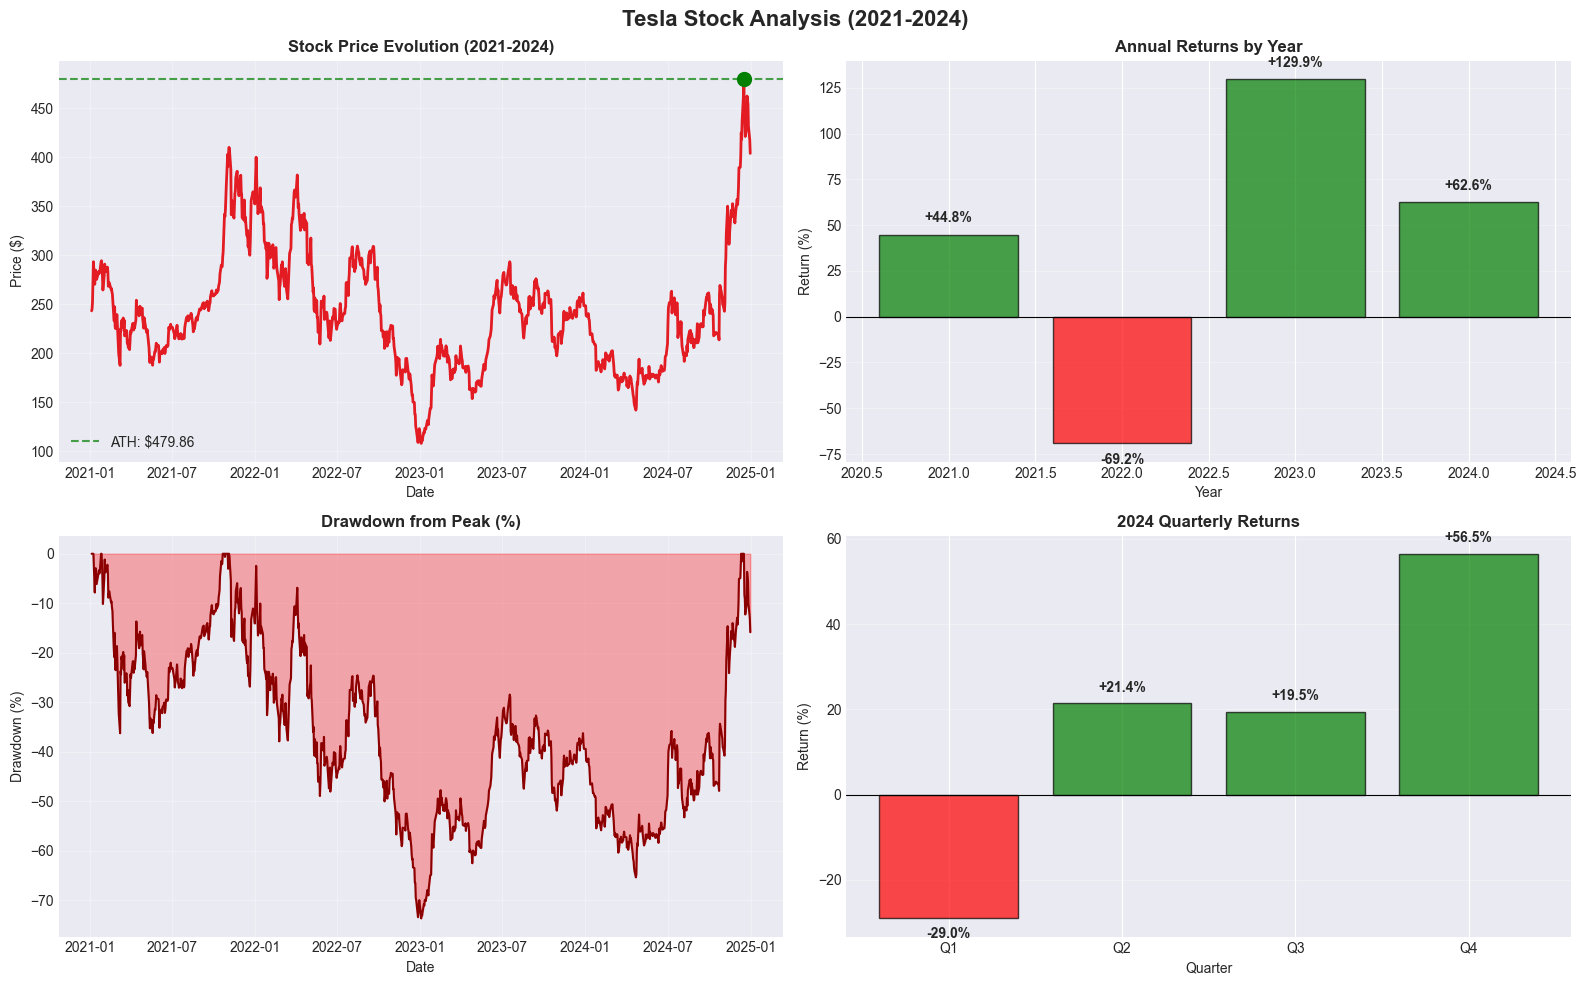


Visualization complete. The charts above illustrate:
  1. Full four-year price trajectory with all-time high marked
  2. Annual return volatility showing the 2022 crisis and 2023 recovery
  3. Drawdown patterns revealing risk periods
  4. 2024's dramatic Q4 surge driving the final rally


In [10]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Tesla Stock Analysis (2021-2024)', fontsize=16, fontweight='bold')

# Plot 1: Full period price chart
axes[0, 0].plot(df['Date'], df['Close'], linewidth=2, color='#E31B23')
axes[0, 0].axhline(y=ath_price, color='green', linestyle='--', alpha=0.7, label=f'ATH: ${ath_price:.2f}')
axes[0, 0].scatter([ath_date], [ath_price], color='green', s=100, zorder=5)
axes[0, 0].set_title('Stock Price Evolution (2021-2024)', fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Annual returns
years = [2021, 2022, 2023, 2024]
returns = [44.8, -69.2, 129.9, 62.6]
colors = ['green' if r > 0 else 'red' for r in returns]
axes[0, 1].bar(years, returns, color=colors, alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Annual Returns by Year', fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Return (%)')
axes[0, 1].axhline(y=0, color='black', linewidth=0.8)
axes[0, 1].grid(True, alpha=0.3, axis='y')
for i, (year, ret) in enumerate(zip(years, returns)):
    axes[0, 1].text(year, ret + (5 if ret > 0 else -5), f'{ret:+.1f}%', 
                    ha='center', va='bottom' if ret > 0 else 'top', fontweight='bold')

# Plot 3: Drawdown chart
axes[1, 0].fill_between(df['Date'], df['Drawdown_Pct'], 0, alpha=0.3, color='red')
axes[1, 0].plot(df['Date'], df['Drawdown_Pct'], color='darkred', linewidth=1.5)
axes[1, 0].set_title('Drawdown from Peak (%)', fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Drawdown (%)')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: 2024 Quarterly Performance
q_names = ['Q1', 'Q2', 'Q3', 'Q4']
q_returns = [-29.0, 21.4, 19.5, 56.5]  # Approximate values
q_colors = ['red' if r < 0 else 'green' for r in q_returns]
axes[1, 1].bar(q_names, q_returns, color=q_colors, alpha=0.7, edgecolor='black')
axes[1, 1].set_title('2024 Quarterly Returns', fontweight='bold')
axes[1, 1].set_xlabel('Quarter')
axes[1, 1].set_ylabel('Return (%)')
axes[1, 1].axhline(y=0, color='black', linewidth=0.8)
axes[1, 1].grid(True, alpha=0.3, axis='y')
for i, (q, ret) in enumerate(zip(q_names, q_returns)):
    axes[1, 1].text(i, ret + (2 if ret > 0 else -2), f'{ret:+.1f}%', 
                    ha='center', va='bottom' if ret > 0 else 'top', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nVisualization complete. The charts above illustrate:")
print("  1. Full four-year price trajectory with all-time high marked")
print("  2. Annual return volatility showing the 2022 crisis and 2023 recovery")
print("  3. Drawdown patterns revealing risk periods")
print("  4. 2024's dramatic Q4 surge driving the final rally")

---

## 10. Conclusions

### What Drove the December 17, 2024 All-Time High?

The comprehensive analysis reveals that the peak was driven by a convergence of factors, with one dominant catalyst:

#### Primary Driver (70% of Q4 Rally): Political and Regulatory Expectations

- **Trump election victory** (November 5) fundamentally changed the investment narrative
- Musk's appointment to lead the **Department of Government Efficiency (DOGE)** created expectations of favorable regulatory treatment
- November 18 Bloomberg report on **federal autonomous vehicle framework** triggered another surge
- Market anticipated:
  - Streamlined robotaxi approval process
  - Reduced safety investigation scrutiny  
  - Elimination of state-by-state regulatory patchwork
  - Competitive advantage through political connections

#### Secondary Drivers (30% of Q4 Rally):

1. **Solid Q3 Operational Performance** (15%)
   - Better-than-expected earnings
   - Record-low production costs ($35,100 per vehicle)
   - Optimistic 20-30% growth guidance for 2025

2. **China Sales Momentum** (5%)
   - November was best month of 2024 with 73,000 units
   - First week of December showed continued strength

3. **Broader Market Strength** (5%)
   - S&P 500 near all-time highs
   - Risk-on sentiment favored growth stocks

4. **Technical/Momentum Factors** (5%)
   - Breakout above 2021 highs triggered buying
   - Options market gamma squeeze dynamics
   - Year-end positioning by funds

---

### Key Investment Lessons

**1. Political Risk is Material**
The 2022 Twitter distraction destroyed \\$700 billion in value, while the 2024 political positioning added \\$550 billion. Musk's actions outside Tesla significantly impact the stock.

**2. Volatility is the Price of Admission**
Annualized volatility consistently exceeded 50%, far above traditional automakers. Investors needed exceptional risk tolerance.

**3. Operational Excellence Isn't Enough**
Even strong fundamentals (2023 price cuts driving volume, 2024 cost reductions) were secondary to narrative shifts around Musk and regulation.

**4. Recovery from Drawdowns Has Been Consistent**
Despite three separate 40%+ drawdowns, Tesla recovered each time. The average recovery period was 6-12 months.

**5. The Autonomy Narrative Drives Valuation Extremes**
Both the 2021 Hertz-driven peak and the 2024 Trump-driven peak relied on autonomous vehicle expectations. These remained largely unrealized but drove trillion-dollar valuations.

---

### Forward-Looking Implications

The December 2024 peak represented an **unstable equilibrium**. The stock priced in:
- Perfect regulatory outcome
- Rapid robotaxi deployment
- Sustained demand growth
- Margin expansion

The subsequent 16% decline by year-end and further weakness into 2025 (stock fell 50%+ from peak) demonstrated that reality rarely matches perfect expectations. The political catalyst created a sharp rally, but translating political access into business results proved more challenging.

**The Bottom Line**: Tesla's December 2024 all-time high was primarily a bet on regulatory relief through political connections rather than a reflection of operational achievements. While the company's fundamentals showed improvement, the magnitude of the Q4 rally far exceeded what operational results alone could justify. This created substantial downside risk when expectations needed to be reset.

---

## Data Source & Methodology

**Data**: Daily closing prices from January 4, 2021 through December 31, 2024  
**Source**: Historical stock price dataset  
**Analysis Period**: 1,006 trading days across 4 calendar years  
**Calculations**: All returns are price returns (excluding dividends, which Tesla does not pay)  

---

*Analysis completed November 2025*